# Candleplotstack
Example showing how a THStack with candle plot option.




**Author:**  Georg Troska, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:52 AM.</small></i>

In [1]:
gStyle->SetTimeOffset(0);
TRandom *rng       = new TRandom();
TDatime *dateBegin = new TDatime(2010,1,1,0,0,0);
TDatime *dateEnd   = new TDatime(2011,1,1,0,0,0);
int bins = 1000;
TH2I *h1 = new TH2I("h1","Machine A",6,dateBegin->Convert(),dateEnd->Convert(),bins,0,1000);
TH2I *h2 = new TH2I("h2","Machine B",6,dateBegin->Convert(),dateEnd->Convert(),bins,0,1000);
TH2I *hsum = new TH2I("h4","Sum",6,dateBegin->Convert(),dateEnd->Convert(),bins,0,1000);

float Rand;
for (int i = dateBegin->Convert(); i < dateEnd->Convert(); i+=86400*30) {
   for (int j = 0; j < 1000; j++) {
      Rand = rng->Gaus(500+sin(i/10000000.)*100,50); h1->Fill(i,Rand); hsum->Fill(i,Rand);
      Rand = rng->Gaus(500+sin(i/12000000.)*100,50); h2->Fill(i,Rand); hsum->Fill(i,Rand);
   }
}

h2->SetLineColor(kRed);
hsum->SetFillColor(kGreen);
TCanvas *c1 = new TCanvas();

THStack *hs = new THStack("hs","Machine A+B");
hs->Add(h1);
hs->Add(h2,"candle2");
hs->Add(hsum, "violin1");
hs->Draw("candle3");
hs->GetXaxis()->SetNdivisions(410);

gPad->SetGrid(1,0);

hs->GetXaxis()->SetTimeDisplay(1);
hs->GetXaxis()->SetTimeFormat("%m/%y");
hs->GetXaxis()->SetTitle("Date [month/year]");

c1->Modified();

gPad->BuildLegend(0.75,0.75,0.95,0.95,"");

Draw all canvases 

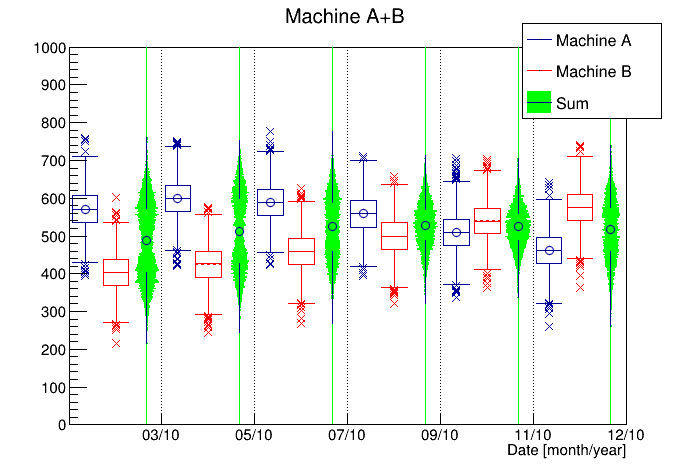

In [2]:
gROOT->GetListOfCanvases()->Draw()